# MLP Visualiser

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv('ous_data/ous_align2.csv')

## Data processing

In [6]:
def analyze_questionnaire(df):
    """
    Create visualisations for questionnaire data based on demographic factors.
    
    Parameters:
    df: pandas DataFrame with columns:
        - First 9 columns: questionnaire answers
        - age: respondent's age
        - educationlevel: education level
        - country: country of residence
        - gender: respondent's gender
    """

    # Set up the plotting style
    plt.style.use('ggplot')
    
    # Create a figure with multiple subplots
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Average responses by age groups
    plt.subplot(2, 2, 1)

    # Create age groups
    df['age_group'] = pd.cut(df['age'], bins=[0, 25, 35, 45, 55, 100], 
                            labels=['18-25', '26-35', '36-45', '46-55', '55+'])
    
    # Calculate mean responses for first 9 questions by age group
    age_means = df.iloc[:, :9].groupby(df['age_group']).mean()
    
    # Create heatmap
    sns.heatmap(age_means, cmap='YlOrRd', annot=True, fmt='.2f')
    plt.title('Average Responses by Age Group')
    plt.xlabel('Question Number')
    plt.ylabel('Age Group')
    
    # 2. Response distribution by education level
    plt.subplot(2, 2, 2)
    edu_means = df.iloc[:, :10].groupby(df['education_level']).mean().T
    edu_means.plot(kind='bar', ax=plt.gca())
    plt.title('Response Patterns by Education Level')
    plt.xlabel('Question Number')
    plt.ylabel('Average Response')
    plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1))
    plt.xticks(rotation=45)
    
    # 3. Country-wise response patterns (top 9 countries)
    plt.subplot(2, 2, 3)
    top_countries = df['country'].value_counts().nlargest(9).index
    country_data = df[df['country'].isin(top_countries)]
    country_means = df.iloc[:, :10].groupby(df['country']).mean()
    
    sns.boxplot(data=country_data.melt(id_vars=['country'], value_vars=df.columns[:10]), 
                x='country', y='value')
    plt.title('Response Distribution by Country (Top 10)')
    plt.xticks(rotation=45)
    plt.xlabel('Country')
    plt.ylabel('Response Value')
    
    # 4. Gender comparison
    plt.subplot(2, 2, 3)
    gender_means = df.iloc[:, :10].groupby(df['sex']).mean().T
    gender_means.plot(kind='line', marker='o')
    plt.title('Gender Comparison Across Questions')
    plt.xlabel('Question Number')
    plt.ylabel('Average Response')
    plt.legend(title='Gender')
    
    plt.tight_layout()
    
    return fig

/var/folders/l8/kn3s865x1215_zj8rfdf3hv80000gn/T/ipykernel_5644/3876222569.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_means = df.iloc[:, :9].groupby(df['age_group']).mean()


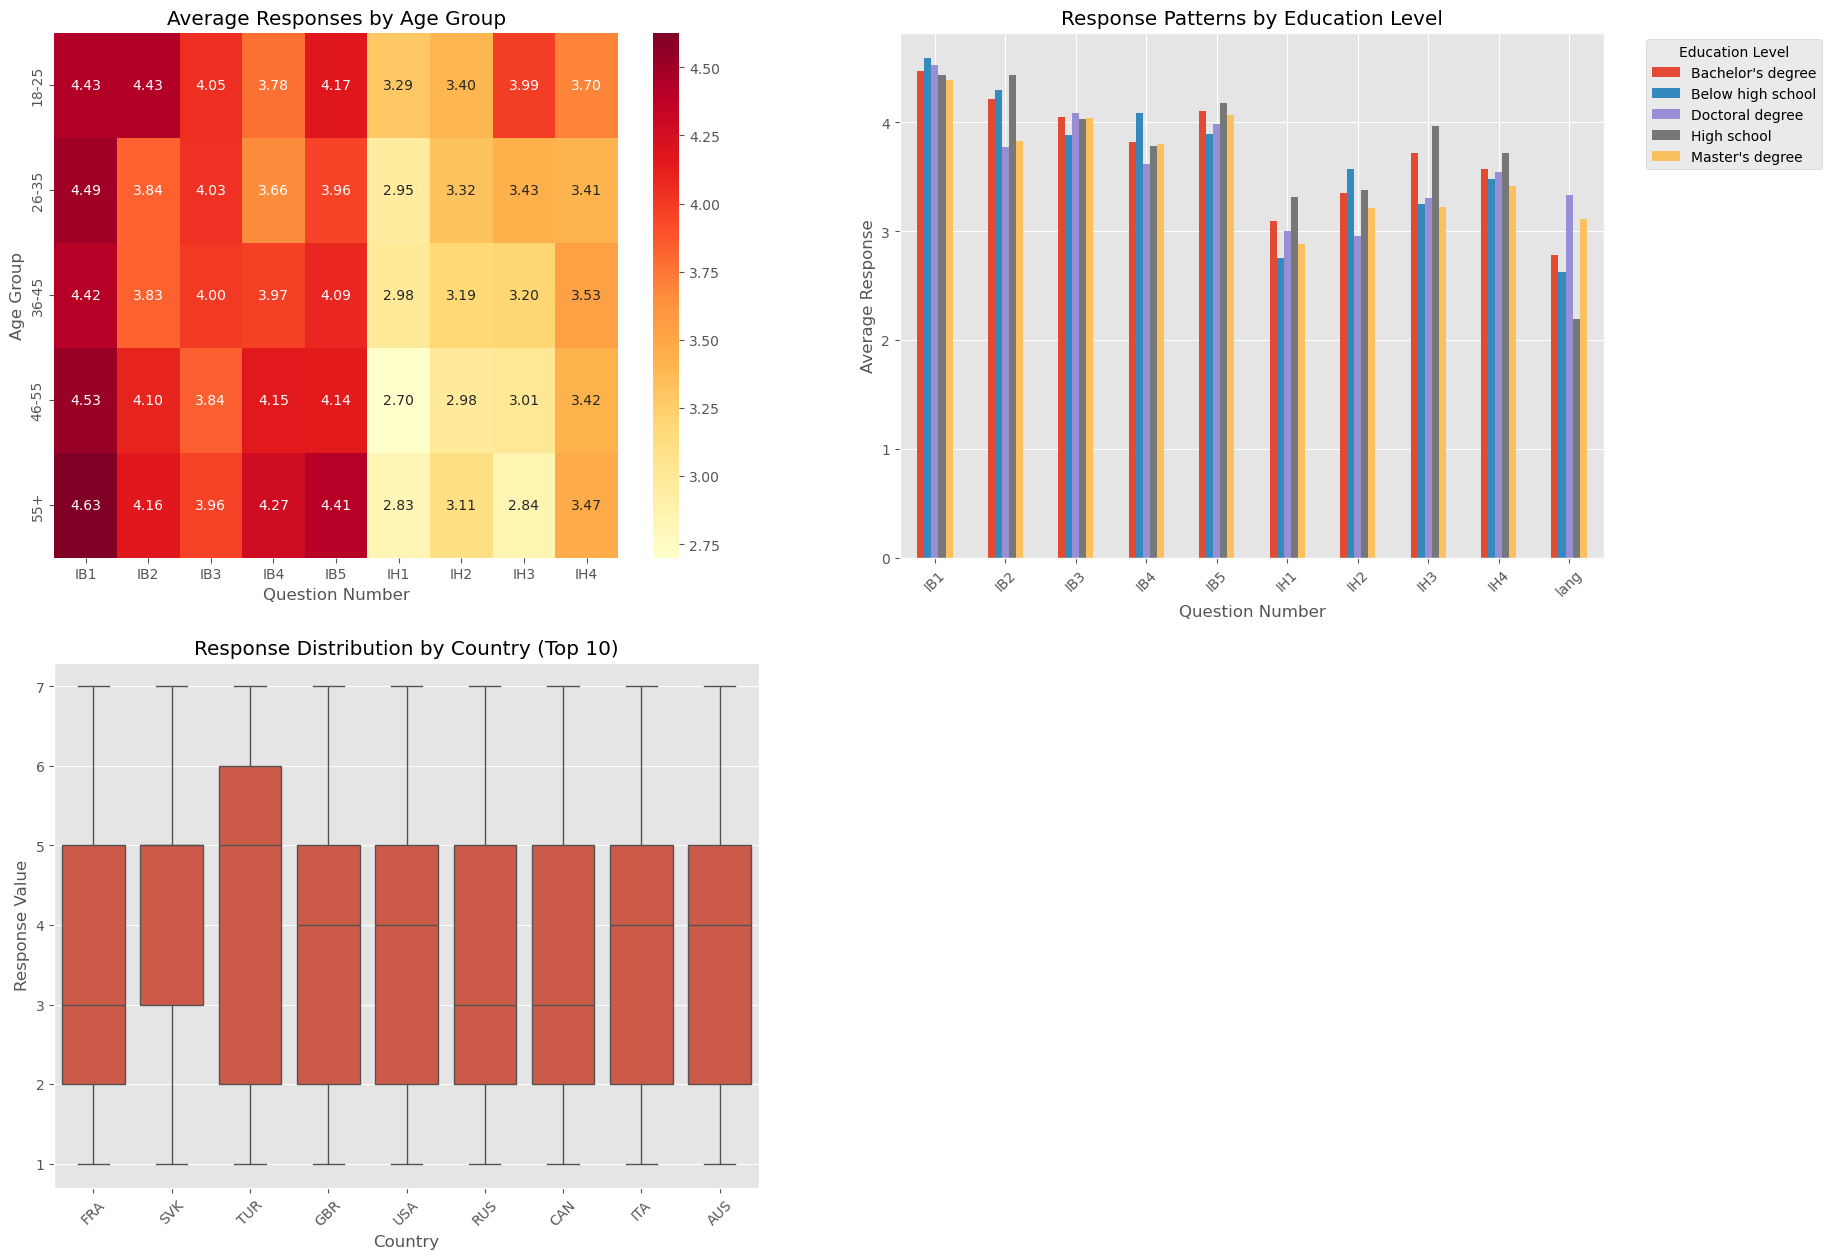

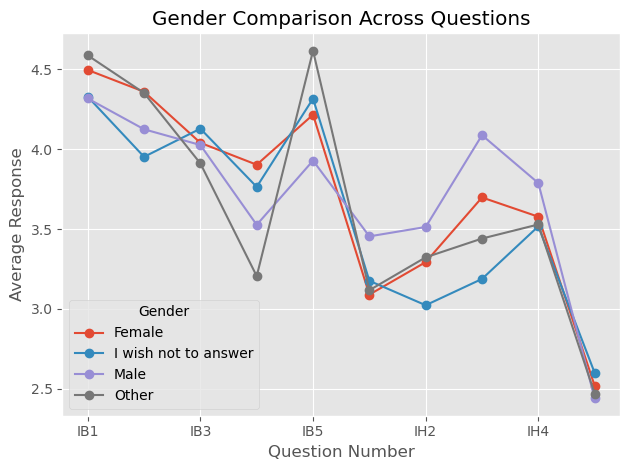

In [7]:
fig = analyze_questionnaire(df)
plt.show()

In [8]:
def plot_continent_analysis(df):
    """
    Create visualizations for questionnaire responses by continent.
    
    Parameters:
    df: pandas DataFrame with questionnaire responses and a 'continent' column
    """
    plt.figure(figsize=(12, 8))
    
    # Calculate mean responses for each continent
    continent_means = df.iloc[:, :9].groupby(df['continent']).mean()
    
    # Create heatmap
    sns.heatmap(continent_means, 
                cmap='viridis',
                annot=True, 
                fmt='.2f',
                cbar_kws={'label': 'Average Response'})
    
    plt.title('Average Questionnaire Responses by Continent')
    plt.xlabel('Question Number')
    plt.ylabel('Continent')
    
    # Adjust layout
    plt.tight_layout()
    
    return plt.gcf()


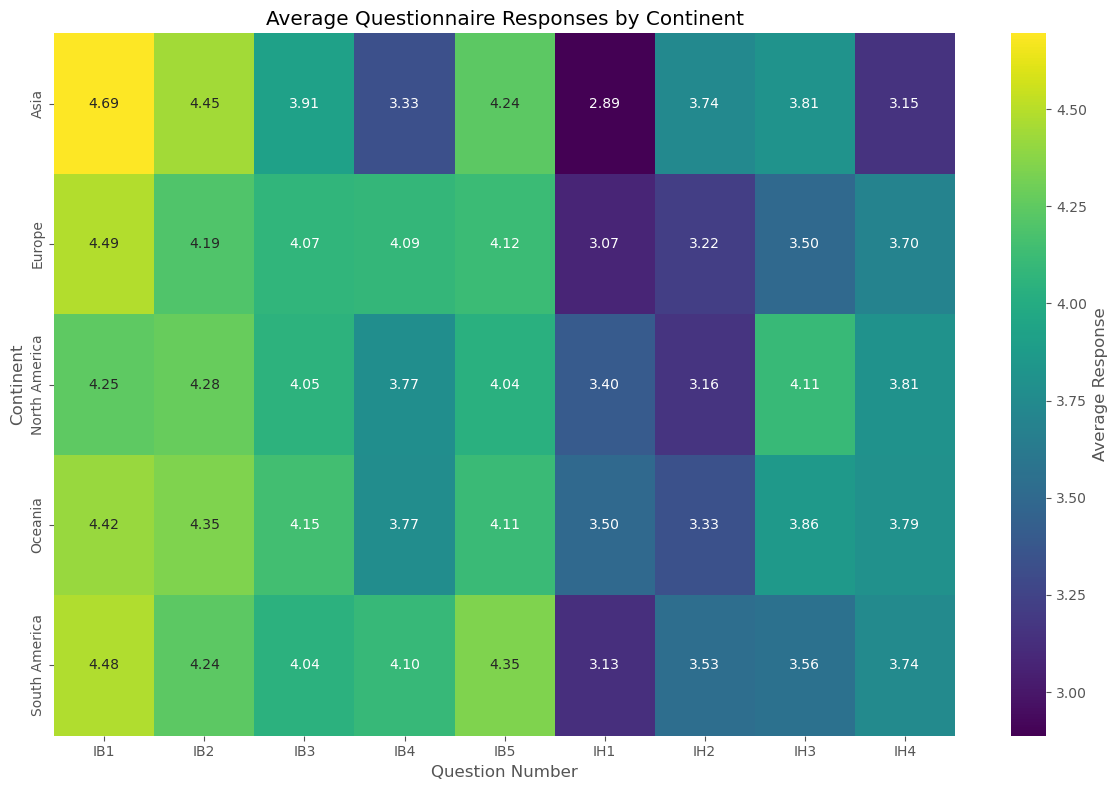

In [9]:
fig = plot_continent_analysis(df)
plt.show()

In [10]:
df_nat = pd.read_csv('data/20241124101056nationalities.csv')

In [11]:
nationality_to_continent = {
    'Indian': 'Asia',
    'Chinese': 'Asia',
    'American': 'North America',
    'Canadian': 'North America',
    'British': 'Europe',
    'French': 'Europe',
    'Emirati': 'Asia',
    'Malaysian': 'Asia',
    'Lebanese': 'Asia',
    'Thai': 'Asia',
    'Macedonian': 'Europe',
    'Pakistani': 'Asia',
    'Iranian': 'Asia',
    'Japanese': 'Asia',
    'Hungarian': 'Europe',
    'Colombian': 'South America',
    'Argentinian': 'South America',
    'Slovak': 'South America',  # Note: Slovakia is actually in Europe
    'Turkish': 'Asia',
    'Ecuadorian': 'South America',
    'Chilean': 'South America',
    'Czech': 'Europe',
    'Peruvian': 'South America',
    'Filipino': 'Asia',
    'Mexican': 'North America',
    'Serbian': 'Europe',
    'Russian': 'Asia',
    'German': 'Europe',
    'Austrian': 'Europe',
    'Polish': 'Europe',
    'Danish': 'Europe',
    'Italian': 'Europe',
    'Australian': 'Oceania',
    'Portuguese': 'Europe',
    'Kazakh': 'Asia',
    'Greek': 'Europe',
    'Spanish': 'Europe',
    'Bulgarian': 'Europe',
    'New Zealander': 'Oceania',  # Also commonly "Kiwi"
    'Brazilian': 'South America',
    'Dutch': 'Europe',
    'Croatian': 'Europe',
    'Romanian': 'Europe',
    'Swiss': 'Europe',
    'Singaporean': 'Asia'
}

In [15]:
def combined_plot_2(df_old, df_new, nationality_to_continent = nationality_to_continent):
    """
    Create error graph showing old and new datasets as separate lines.
    
    Parameters:
    df_old: Original DataFrame with questionnaire columns
    df_new: New DataFrame with columns: base, persona, question, score, etc.
    nationality_to_continent: Dictionary mapping nationalities to continents
    """
    plt.figure(figsize=(15, 8))
    
    # Process old format data
    if df_old is not None:
        # Map continents
        df_old['continent'] = df_old['continent'].map(nationality_to_continent)
        
        # Calculate mean and standard error across all responses
        means_old = df_old.iloc[:, :9].mean()
        errors_old = df_old.iloc[:, :9].sem()
        
        # Plot old format data
        x_old = range(9)
        plt.errorbar(x_old, 
                    means_old, 
                    yerr=errors_old,
                    fmt='o-',  # solid line with circles
                    capsize=3,
                    label='Original Dataset',
                    markersize=6,
                    color='blue')
    
    # Process new format data
    if df_new is not None:
        # Calculate mean and standard error for each question
        means_new = df_new.groupby('question')['score'].mean()
        errors_new = df_new.groupby('question')['score'].sem()
        
        # Plot new format data
        x_new = range(len(means_new))
        plt.errorbar(x_new, 
                    means_new, 
                    yerr=errors_new,
                    fmt='s-',  # solid line with squares
                    capsize=3,
                    label='New Dataset',
                    markersize=6,
                    color='red')
    
    # Customize the plot
    plt.xlabel('Question Number')
    plt.ylabel('Score')
    plt.title('Comparison of Dataset Responses\nwith Standard Error Bars')
    
    # Set x-ticks based on the larger dataset
    max_questions = max(len(x_old) if df_old is not None else 0,
                       len(x_new) if df_new is not None else 0)
    plt.xticks(range(max_questions), [f'Q{i}' for i in range(max_questions)])
    
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Set y-axis limits
    plt.ylim(0, 7)
    
    plt.tight_layout()
    return plt.gcf()


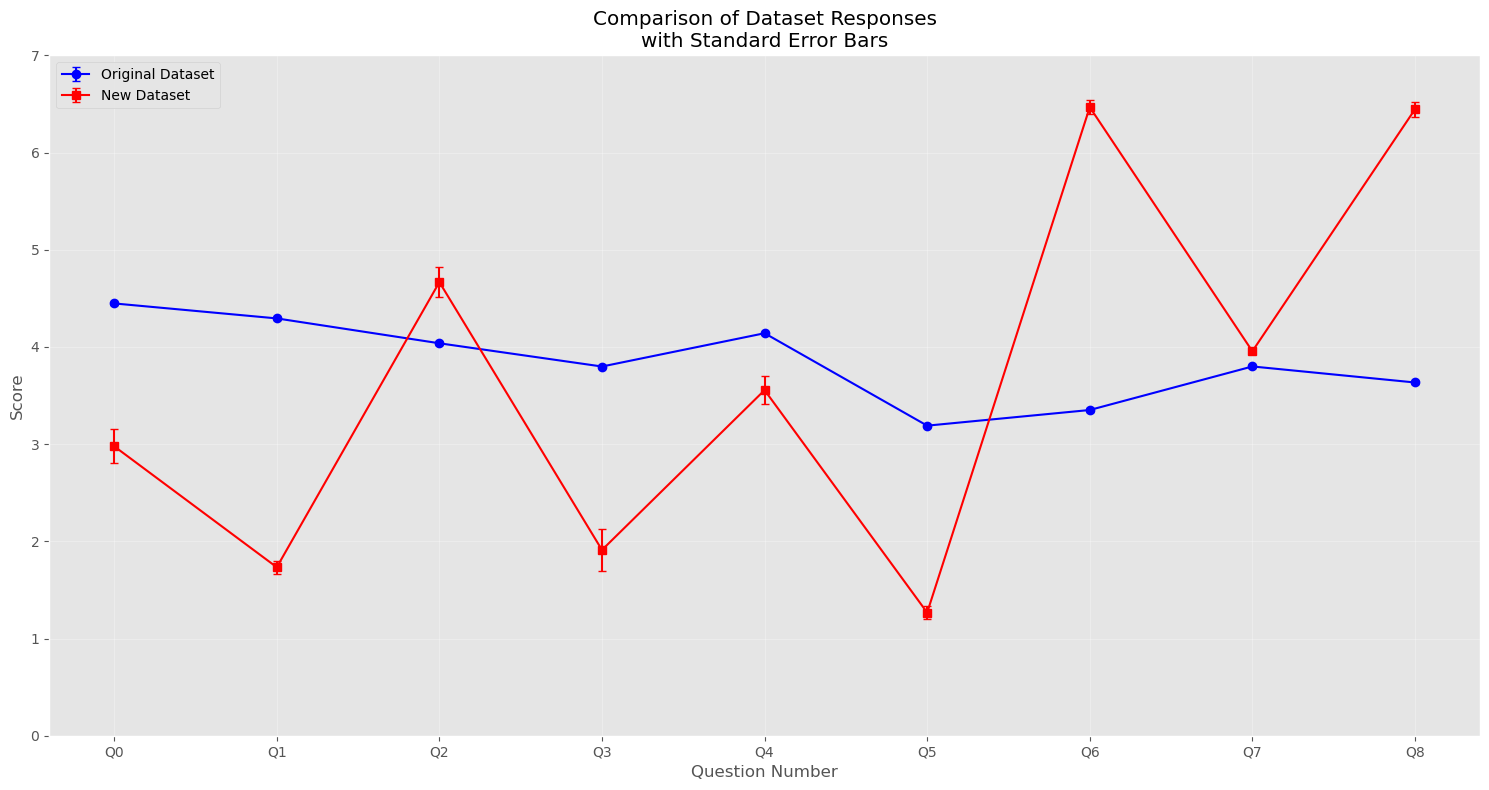

In [16]:
fig = combined_plot_2(df, df_nat)

In [28]:
df = pd.read_csv("ous_data/ous_align2.csv")
df[:5] # Human


,IB1,IB2,IB3,IB4,IB5,IH1,IH2,IH3,IH4,lang,education_level,sex,country_origin,country,age,continent
0,6,3,2,2,4,1,2,2,1,1,Doctoral degree,Male,226.0,ARE,35.0,Asia
1,4,2,4,1,3,3,5,5,2,1,High school,Female,131.0,MYS,19.0,Asia
2,4,5,3,2,5,5,6,5,4,1,High school,Female,131.0,MYS,19.0,Asia
3,5,5,6,2,2,2,2,2,1,1,High school,Female,195.0,MYS,22.0,Asia
4,6,3,3,5,2,2,4,4,5,1,High school,Female,131.0,MYS,20.0,Asia


In [29]:
 # Nationality personas
from shared import nationality_to_continent
df_nat = pd.read_csv("data/20241124101056nationalities.csv")
mapping = {0: "IB1", 1: "IH1", 2: "IB2", 3: "IH2", 4: "IB3", 5: "IH3", 6: "IB4", 7: "IH4", 8: "IB5"}
df_nat["continent"] = df_nat["persona"].map(nationality_to_continent)
df_nat["question"] = df_nat["question"].map(lambda x: mapping[x])
df_nat = df_nat.pivot(columns="question", index=["base", "feature", "steerage", "persona", "continent"], values="mean_score").reset_index()
df_nat = df_nat["IB1 IB2	IB3	IB4	IB5	IH1	IH2	IH3	IH4	continent".split()]

df_nat["continent"] = df_nat["continent"] + " Persona"
df_nat[:5]

question,IB1,IB2,IB3,IB4,IB5,IH1,IH2,IH3,IH4,continent
0,2.429584,4.326601,3.091429,5.768799,5.784559,1.633885,1.103013,2.115229,4.395281,North America Persona
1,3.910964,5.477444,4.061324,6.407083,6.425338,2.227266,2.069450,1.432451,4.290123,South America Persona
2,2.653291,5.233051,3.881040,6.063238,6.367745,1.855775,1.494520,1.543501,4.450189,Oceania Persona
3,3.150205,4.872793,4.279499,6.394321,6.212352,2.021663,2.004982,1.408708,4.535746,Europe Persona
4,3.552553,5.247980,3.871808,6.433811,6.522006,2.061911,1.983887,1.571601,4.198542,South America Persona


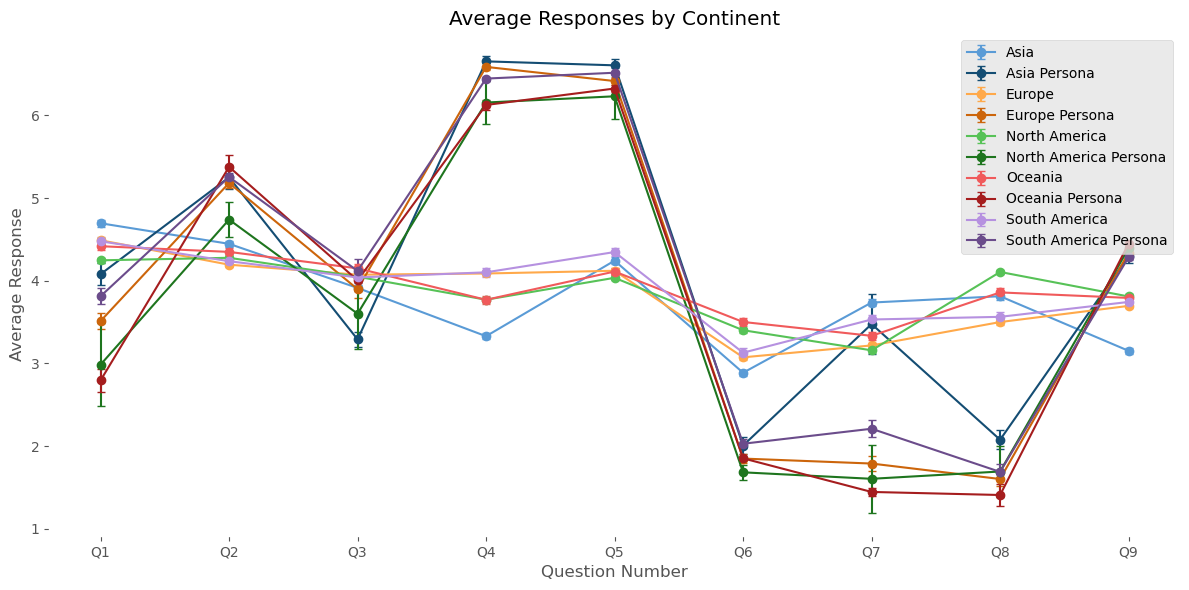

In [30]:
def plot_simple_error_graph(df):
    """
    Create a simple error graph showing mean responses and standard errors by continent.
    
    Parameters:
    df: pandas DataFrame with questionnaire responses and continent column
    """
    plt.figure(figsize=(12, 6))
    
    # Calculate means and standard errors
    means = df.iloc[:, :9].groupby(df['continent']).mean()
    errors = df.iloc[:, :9].groupby(df['continent']).sem()
    
    # Create x-axis points
    x = range(9)  # for 9 questions

    color_map = {
        'Asia': "#5A9BD6",
        'Asia Persona': "#144D73",
        'Europe': "#FFA94A",
        'Europe Persona': "#CC650B",
        'North America': "#57C257",
        'North America Persona': "#1E751E",
        'Oceania': "#F05A5B",
        'Oceania Persona': "#A51D1E",
        'South America': "#B691E0",
        'South America Persona': "#6B4C8B",
    }
    
    # Plot for each continent
    for continent in means.index:
        plt.errorbar(x, 
                    means.loc[continent], 
                    yerr=errors.loc[continent],
                    fmt='o-',  # line with circles
                    capsize=3,  # error bar cap width
                    label=continent,
                    markersize=6,
                    color=color_map.get(continent, 'black'))
    
    # Customize the plot
    plt.xlabel('Question Number')
    plt.ylabel('Average Response')
    plt.title('Average Responses by Continent')
    plt.xticks(x, [f'Q{i+1}' for i in x])
    plt.grid(True, alpha=0.3)
    plt.gca().set_facecolor("white")
    plt.legend(loc="upper right")
    
    plt.tight_layout()
    return plt.gcf()


plot_simple_error_graph(pd.concat([df, df_nat]))
None
